Total # images to process = 10
Reading Image: img/0002.jpg
Original Image
shape (845, 1275, 3)


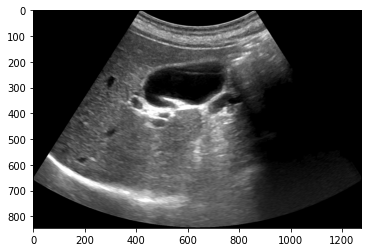

Smoothed Image
shape (845, 1275, 3)


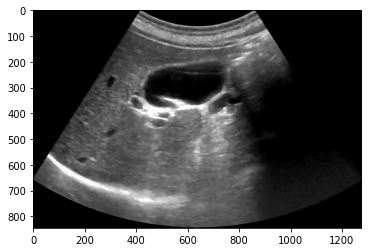

Erorded Image
shape (845, 1275, 3)


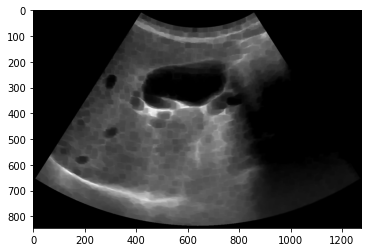

Gradient
shape (845, 1275)


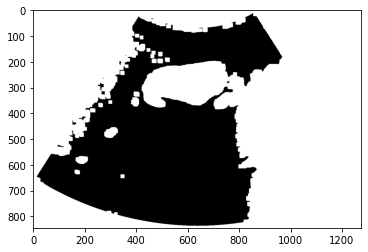

shape (845, 1275)


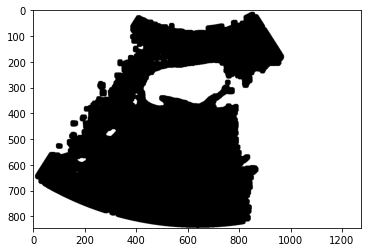

In [6]:
import os
import cv2 as cv
import json
from glob import glob
import numpy as np
import argparse
import matplotlib.pyplot as plt

def show_image(img):
    if img is None:
        print('Could not open or find the image: ', args.input)
        exit(0)
    else:
        '''cv2.imshow('image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()'''
        print("shape", img.shape)
        plt.imshow(img, cmap='gray')
        plt.show()
    return

def generate_mask(img):
    print("Reading Image:", img)
    image = cv.imread(img)
    print("Original Image")
    show_image(image)


    image = cv.bilateralFilter(image, d=9,sigmaColor=75,sigmaSpace=75,borderType=cv.BORDER_REPLICATE)
    #image = cv.fastNlMeansDenoising(image, None, h=15, templateWindowSize=7, searchWindowSize=21) 
    print("Smoothed Image")
    show_image(image)
    kernel = np.ones((5,5), np.uint8) 
    image = cv.erode(image, kernel, iterations=3) 
    print("Erorded Image")
    show_image(image)
    #image = cv.Sobel(image,cv.CV_64F,1,1,ksize=5)
    print("Gradient")
    # how_image(image)
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    #show_image(gray)
    ret, thresh = cv.threshold(gray,60,255,cv.THRESH_BINARY_INV)
    show_image(thresh)

    kernel = np.ones((3, 3), np.uint8) 
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, 
                                kernel, iterations = 2) 
    
    # Background area using Dialation 
    bg = cv.dilate(closing, kernel, iterations = 3) 
    
    # Finding foreground area 
    dist_transform = cv.distanceTransform(closing, cv.DIST_L2, 0) 
    ret, fg = cv.threshold(dist_transform, 0.02
                            * dist_transform.max(), 255, 0) 
    show_image(fg)


if __name__ == "__main__":
   
    
    img_path = "img"
    
    images = glob(os.path.join(img_path,"*.jpg"))

    print("Total # images to process =", len(images))

    #for img in images:
    generate_mask(images[2])